# Data Preprocessing 資料預處理  
**資料的品質、特徵的選取**決定了機器學習（Machine Learning）的上限，而模型（Model）只是逼近這個上限。

-------------------------------------------------------------------------------------- 
## STEP
1. **填補缺失值（Missing Data）**：
  - 特徵為「**數值**」型：
    - 用「**中位數** 」填補缺失值：`median()`
    - 數值型特徵是指「有大小關係的數字」
    - 不使用「**平均數**」填補缺失值，是因為這可能會拉高或拉低整體
    - *例如本題的 Age*
    
  - 特徵為「**類別**」型：
    - 用「**出現最多的選項**」填補缺失值：`df.value_counts().idxmax()`
    - 需要再處理（One-Hot Encoding），因為不能讓此資料有大小關係
    - *例如本題的 Embarked*


2. 剖析欄位，提取有用的特徵：
    - 如果類別型特徵的「**選項太多**」，可以(1)合併 (2)丟棄稀少的（出現次數少的選項）
    - *例如本題的 Name，提取稱謂 salutation 的部分*


3. 對類別型特徵做 **One-Hot Encoding**：  
  - 目標：把對「單選題(單欄)」變為「是非題(多欄)」
  
    - 如果類別「**有大小關係**」，可以偷懶不做 One-Hot Encoding，*例如本題的 Pclass*
    - 如果類別「**只有二種選擇**」，可以偷懶不做 One-Hot Encoding，*例如本題的 Sex*
    - 如果先前懶得填補類別型缺失值，那麼 One-Hot Encoding 需要加 **`dummy_na=True`**  
      e.g. `pd.get_dummies(train_df, columns=["Embarked"], dummy_na=True)`


4. **資料清洗（Data Cleansing）**：
    - 只保留需要的資料，丟棄不需要的資料
    - 但**不知道為何而做，就不要動！！！**不要隨便亂丟棄或合成資料！
    - *例如本題的 Cabin，缺失值太多故丟棄此特徵*


## NOTE
- sklearn 規定：
  1. 資料必須為數字
  2. 資料不得有空值 NA

In [1]:
import pandas as pd

train_df = pd.read_csv("titanic/train.csv", encoding="utf-8")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
test_df = pd.read_csv("titanic/test.csv", encoding="utf-8")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 觀察特徵類型：
- 無用：PassengerId(刪)
- 答案：Survived
- 數值：Age, SibSp, Parch, Fare
- 類別：Pclass, Name(取出稱謂salutation), Sex, Ticket(刪，不知怎麼用), Cabin(刪，缺失值太多), Embarked

## step1: 填補缺失值 Missing Data

In [3]:
# 統計每個欄位缺失值（NA）數量：sum(False=0, True=1)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 數值型：填中位數
注意：**Pclass 是類別型特徵**（雖然他以數字方式呈現），所以不能用**中位數**來填補缺失值；  
　　　在此是因為 Pclass 無缺失值，所以偷懶沒做處理。XD

In [4]:
# 填補缺失值_訓練資料：數值型（有大小關係），填中位數
med = train_df.median()
print(med)
train_df = train_df.fillna(med)

# 填補缺失值_測試資料：數值型，用訓練資料算出來的中位數
test_df = test_df.fillna(med)

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


### 類別型：填出現最多的選項

In [5]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
# 填補缺失值_訓練資料：類別型，填出現最多的選項
# 找到出現最多次選項的索引：idxmax()
most = train_df["Embarked"].value_counts().idxmax()
print("出現最多的選項是：", most)
train_df["Embarked"] = train_df["Embarked"].fillna(most)

# 填補缺失值_測試資料：類別型，用訓練資料找出來的的選項
test_df["Embarked"] = test_df["Embarked"].fillna(most)

出現最多的選項是： S


## step2: 剖析欄位，提取有用的特徵

In [7]:
def namecut(s):
    return s.split(",")[-1].split(".")[0].strip()

# 統計稱謂出現的的次數
salutation = train_df["Name"].apply(namecut).value_counts()
salutation

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Sir               1
the Countess      1
Don               1
Capt              1
Jonkheer          1
Mme               1
Ms                1
Name: Name, dtype: int64

In [8]:
# 列出數量大於30的稱謂
reserved = salutation[salutation > 30].index
reserved

Index(['Mr', 'Miss', 'Mrs', 'Master'], dtype='object')

In [9]:
# 看一下稱謂和生死的關係（下面沒有用到~~）
ss_corr = train_df["Name"].apply(namecut)
pd.crosstab(ss_corr, train_df["Survived"]).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [10]:
def namecut_2(s, reserved):
    s = s.split(",")[-1].split(".")[0].strip()
    if s in reserved:
        return s 
    else:
        return None

# namecut_2：稱謂數量大於30的保留，小於30的改為None
# reserved ：數量大於30的稱謂 = ['Mr', 'Miss', 'Mrs', 'Master']
train_df["Name"] = train_df["Name"].apply(namecut_2, reserved=reserved)
test_df["Name"] = test_df["Name"].apply(namecut_2, reserved=reserved)

In [11]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,None,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,male,26.0,0,0,111369,30.0000,C148,C


## step3: 對類別型特徵做 **One-Hot Encoding**

In [12]:
# 批次 One-Hot Encoding
# dummy = pd.get_dummies(train_df["Embarked"])
# x_train_raw = pd.concat([train_df, dummy], axis=1)

In [13]:
# 一鍵 One-Hot Encoding
# dummy_na=True：增加一欄紀錄空值
# train_raw = pd.get_dummies(train_df, columns=["Name", "Sex", "Embarked"], dummy_na=True)
# test_raw = pd.get_dummies(test_df, columns=["Name", "Sex", "Embarked"], dummy_na=True)

In [14]:
# 一鍵 One-Hot Encoding
train_raw = pd.get_dummies(train_df, columns=["Name", "Sex", "Embarked"])
test_raw = pd.get_dummies(test_df, columns=["Name", "Sex", "Embarked"])

In [15]:
train_raw

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,1,0,1,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,0,0,0,1,1,0,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,NaN,0,0,0,0,0,1,0,0,1
887,888,1,1,19.0,0,0,112053,30.0000,B42,0,1,0,0,1,0,0,0,1
888,889,0,3,28.0,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,1,0,0,0,1
889,890,1,1,26.0,0,0,111369,30.0000,C148,0,0,1,0,0,1,1,0,0


## step4: 資料清洗 Data Cleansing

In [16]:
# 查看欄位
train_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Name_Master', 'Name_Miss', 'Name_Mr', 'Name_Mrs',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [17]:
x_train = train_raw.drop(["PassengerId", "Survived", "Ticket", "Cabin"], axis=1)
y_train = train_raw["Survived"]
x_test = test_raw.drop(["PassengerId", "Ticket", "Cabin"], axis=1)
testid = test_raw["PassengerId"]

In [18]:
# 訓練題目
x_train

,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,1,0,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,0,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,0,1,0,0,1,0,0,0,1
888,3,28.0,1,2,23.4500,0,1,0,0,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0,1,1,0,0


In [19]:
# 訓練答案
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
# 測試題目
x_test

,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,0,1,0,0,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,0,1,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,0,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0,0,1,0,0,1,0,0,1
414,1,39.0,0,0,108.9000,0,0,0,0,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,0,1,0,0,1,0,0,1
416,3,28.0,0,0,8.0500,0,0,1,0,0,1,0,0,1


In [21]:
# 測試時，配對預測答案用
testid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

## 資料視覺化：matplotlib  & seaborn
~ 繪製 heatmap 看相關性 correlation

In [22]:
train_raw.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.026151,-0.073110,0.038850,0.011245,-0.042939,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.085221,0.327093,-0.549199,0.339040,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.082081,-0.000576,0.142698,-0.149209,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.373960,-0.247483,0.180808,0.169578,-0.081163,0.081163,0.030248,-0.031415,-0.006729
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.349559,0.087932,-0.250489,0.063407,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.267344,0.105567,-0.333905,0.225852,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.010908,0.118271,-0.183766,0.105203,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Name_Master,-0.026151,0.085221,0.082081,-0.373960,0.349559,0.267344,0.010908,1.000000,-0.109844,-0.254903,-0.087580,-0.159934,0.159934,-0.035225,0.010478,0.024264
Name_Miss,-0.073110,0.327093,-0.000576,-0.247483,0.087932,0.105567,0.118271,-0.109844,1.000000,-0.595692,-0.204670,0.686808,-0.686808,0.026215,0.171117,-0.130650
Name_Mr,0.038850,-0.549199,0.142698,0.180808,-0.250489,-0.333905,-0.183766,-0.254903,-0.595692,1.000000,-0.474952,-0.867334,0.867334,-0.072567,-0.078338,0.112870


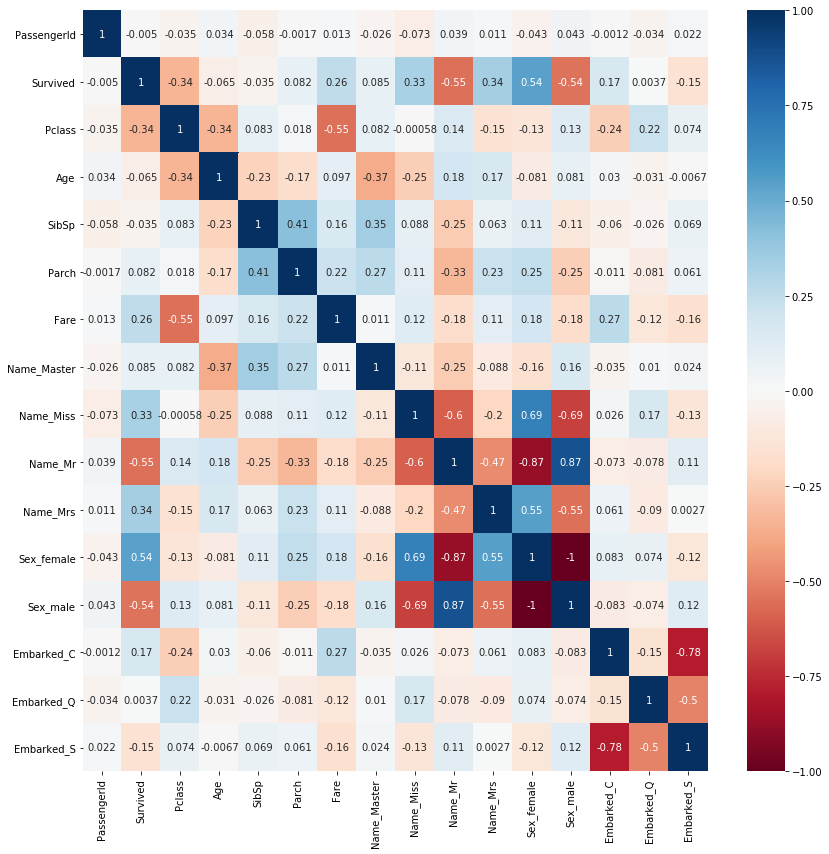

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(14,14))
sns.heatmap(train_raw.corr(), annot=True, cmap='RdBu')